## Questions that I would like to explore:
    
#### 1.  What are the distributions of orders by day of the week, hour of the day?
#### 2. Reorder Interval  - How often do customers put in a new order? Distribution of the reorder interval?
#### 3. What are the top products, aisles, departments ordered?
#### 4. What are the types of products reordered? Are there differences between products re ordered within a week compared to within a month? 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Load data: 
aisles = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/aisles.csv')
departments = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/departments.csv')
orders = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/orders.csv')
products = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/products.csv')
orderproducts_prior = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/order_products__prior.csv')
orderproducts_train = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/order_products__train.csv')

In [3]:
## Explore orders by day and hours of the day in the Orders dataset:
orders. head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


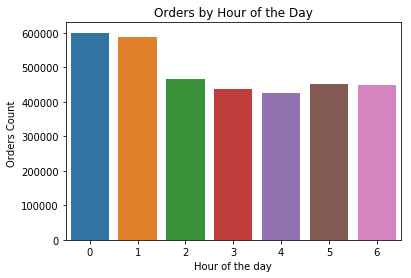

In [4]:
## Orders by Hour of the day
sns.countplot(data = orders, x ='order_dow')
plt.xlabel('Hour of the day')
plt.ylabel('Orders Count ')
plt.title('Orders by Hour of the Day')
plt.show()

#### 0, 1 in the plot denotes Saturday and Sunday. Plot shows that most orders happen on the weekends, and lower during the weekdays especially Wednesday 


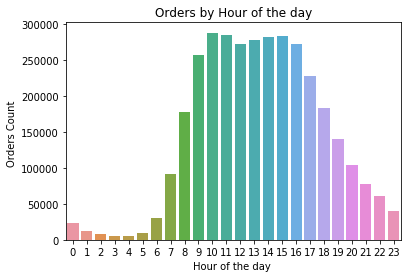

In [5]:
## Orders by Hour of the day 
sns.countplot(data = orders, x ='order_hour_of_day')
plt.xlabel('Hour of the day ')
plt.ylabel('Orders Count ')
plt.title('Orders by Hour of the day')
plt.show()

#### Most orders happen during the day between 10:00 and 16:00

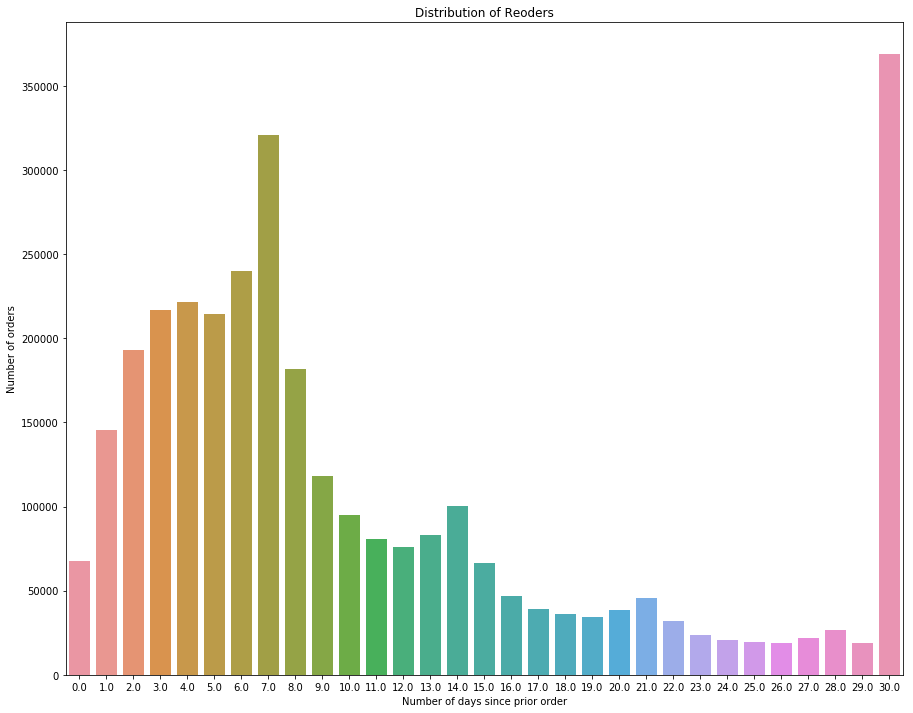

In [6]:
## Explore the distribution of days since prior order:
plt.subplots(figsize=(15, 12))
sns.countplot(data =orders, x='days_since_prior_order')
plt.xlabel('Number of days since prior order')
plt.ylabel('Number of orders')
plt.title('Distribution of Reoders')
plt.show()


#### We can see that the highest number of reorders are within 7 days or a month. It would be more insightful to dive deeper to see what products are reordered within a week vs within a month.

In [7]:
### Inorder to gain more insights into the order_products_ prior dataset, we need to merge
###information from orders, products, departments and aisles dataset, matching on product ID, aisle ID, department ID: 

df = pd.merge(orderproducts_prior, products, on ='product_id', how='left')
df = pd.merge(df, aisles, on ='aisle_id', how='left')
df = pd.merge(df, departments, on ='department_id', how='left')
df = pd.merge(df, orders, on ='order_id', how='left' )

In [8]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [9]:
## Best selling departments, sales in each department
bs= df.groupby('department')['order_id'].count().reset_index()
bs.columns = ['department','total_orders']

In [10]:
bs_plot = bs.sort_values(by='total_orders', ascending=False)

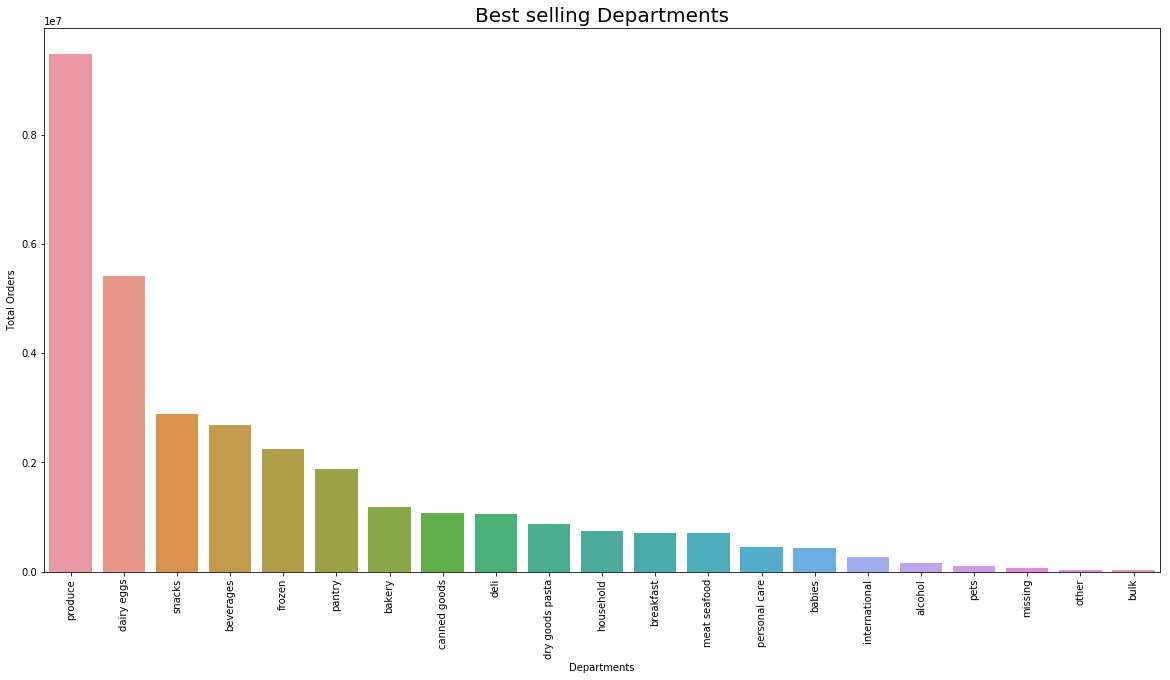

In [11]:
plt.subplots(figsize=(20,10))
plt.xticks(rotation = 'vertical')
sns.barplot(bs_plot.department, bs_plot.total_orders)
plt.xlabel('Departments')
plt.ylabel('Total Orders')
plt.title('Best selling Departments', fontsize= 20)
plt.show()

In [12]:
## We can see that the department Produce seem to generate the highest number of sales. 
## I am curious to see what kinds of products are included in the Produce Department
df.aisle[df['department']=='produce'].unique()

array(['fresh vegetables', 'packaged vegetables fruits', 'fresh fruits',
       'packaged produce', 'fresh herbs'], dtype=object)

### Exploring reorder patterns: 
Earlier we saw that most reorders are within 7 days or 30 days.  I want to compare the types of products re-ordered. 
Will there be a difference in the types of products reordered within 7 days compared to 30 days.


In [17]:
## Aggregate by days since prior order and aisle and user id  and count the number of orders:
bsr = df.groupby(['days_since_prior_order','aisle','user_id'])['order_id'].count().reset_index()
bsr.head()

,days_since_prior_order,aisle,user_id,order_id
0,0.0,air fresheners candles,1617,1
1,0.0,air fresheners candles,2230,2
2,0.0,air fresheners candles,2658,6
3,0.0,air fresheners candles,2903,7
4,0.0,air fresheners candles,4563,1


In [19]:
#Rename columns 
bsr.columns = ['days since prior order', 'aisle','user_id', 'total orders']
bsr = bsr.sort_values(by='days since prior order', ascending=False)
bsr.head()

,days since prior order,aisle,user_id,total orders
15418000,30.0,yogurt,206209,1
15417987,30.0,yogurt,206157,10
15417997,30.0,yogurt,206199,4
15417996,30.0,yogurt,206188,1
15417995,30.0,yogurt,206182,1


In [20]:
# ## Create Function 'Reorder' to explore re-order list of aisles by the number of reorder interval:

def reorder(day):
        bsr_day = bsr[bsr['days since prior order'] == day].sort_values(by='total orders', ascending = False)
        plt.subplots(figsize=(20,9))
        graph = sns.barplot(bsr_day.aisle.head(40),bsr_day['total orders'])
        plt.xticks(rotation = 'vertical', fontsize=12)
        plt.title('Top aisles of products re-ordered within ' + str(day) + ' days', fontsize=20)
        return graph

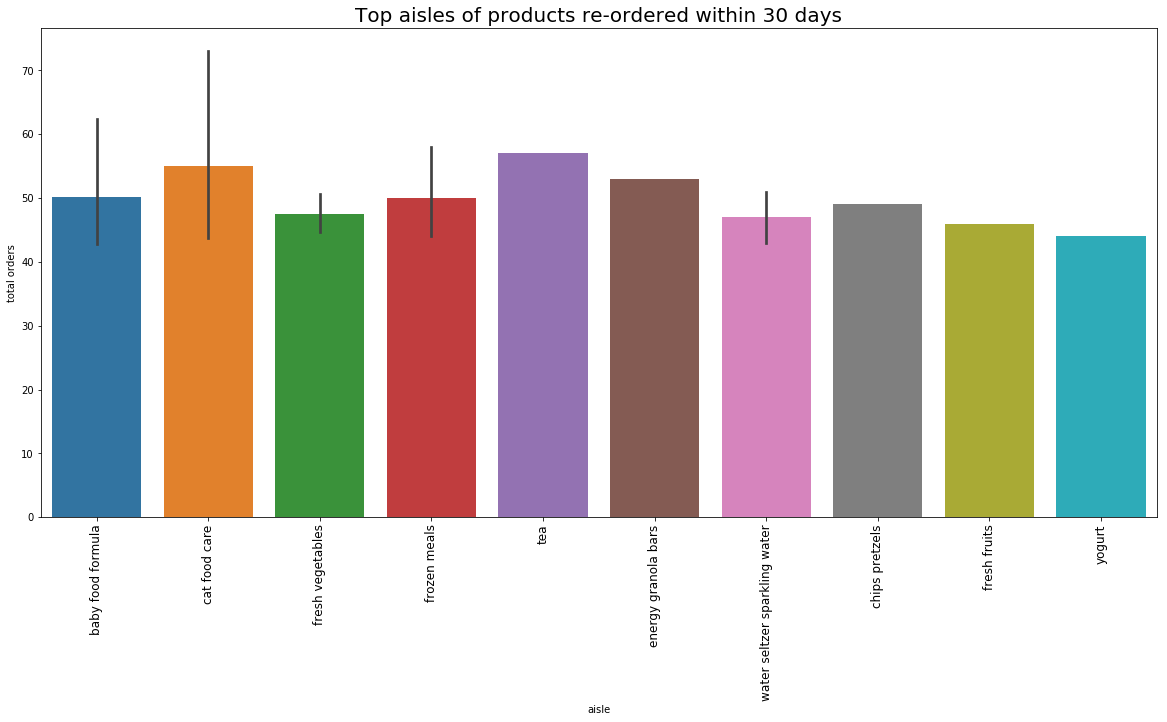

In [21]:
####Looking at the 30 day interval: lists of aisles of products reordered:
reorder(30)

**It looks like baby food formula, cat food care, frozen meals, tea, energy granola bars are among the most popular food reordered within 30 days. It makes sense, since these food can be stored for a longer period of time**

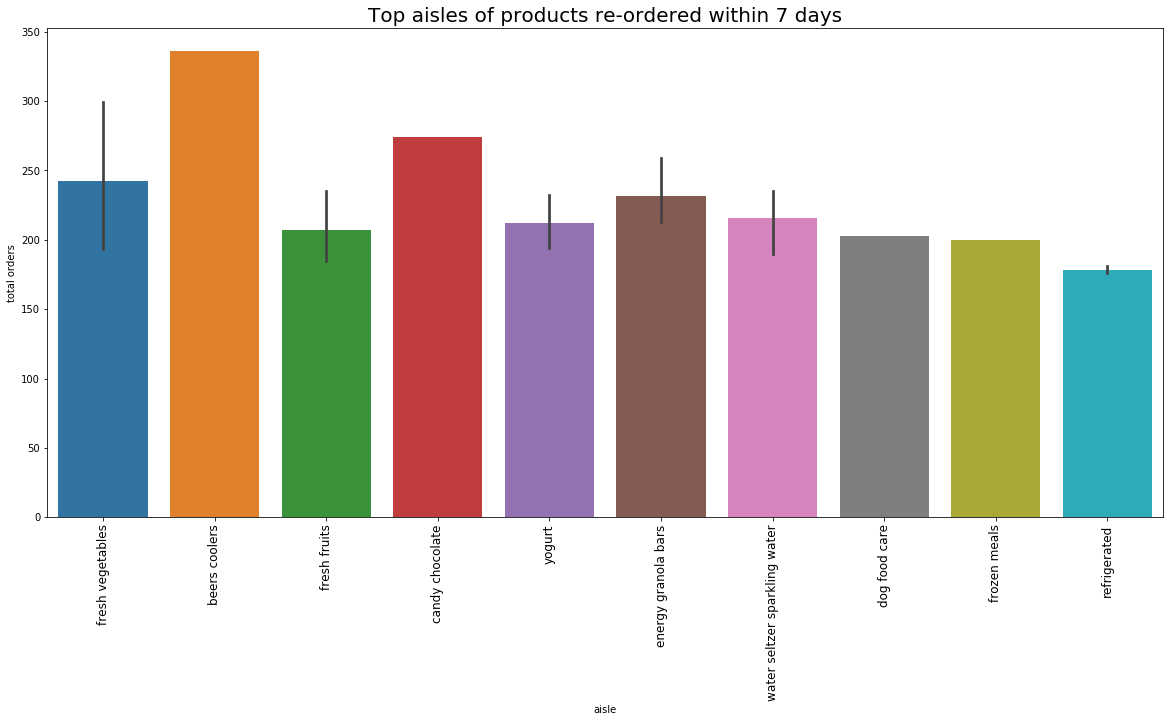

In [22]:
## Plot top aisles of products reordered within the 7 day re-order interval
reorder(7)

**Meanwhile, it looks like beer coolers, candy chocolate, yoghurt are among the food most reordered within 7 days. **

** It is fascinating to see that there is a similar pattern of products reordered: fresh fruits and fresh vegetables, yogurt are among the top products reordered regardless of 7 days or 30 days **